No Outliers in Cost
No Outliers in MegaWatts
Mean Cost: $ 461.6
Standard Deviation of Cost: $ 167.4
Mean of Cost Per Megawatt: $ 0.5672
Standard Deviation of Cost Per Megawatt: $ 0.1815


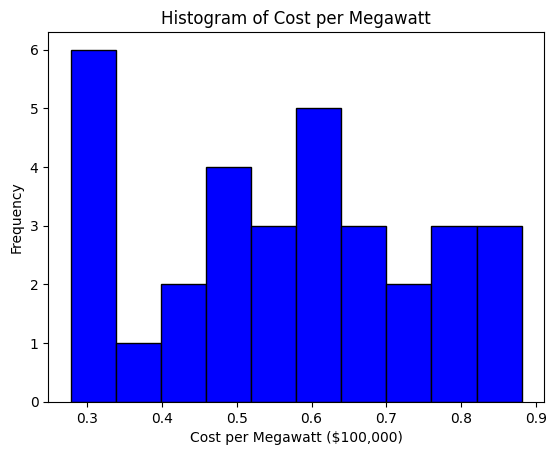

In [13]:
# PROGRAMMING TASKS
# QUESTION 5
import numpy as np
import matplotlib.pyplot as plt


cost = np.array([345.39, 460.05, 452.99, 443.22, 652.23, 642.23, 272.37, 317.21, 457.12, 690.19,
                 350.63, 402.59, 412.18, 495.56, 394.36, 423.32, 712.27, 289.66, 881.24, 490.88,
                 567.79, 665.99, 621.45, 608.80, 473.64, 697.14, 207.51, 288.48, 284.88, 280.36,
                 217.38, 270.71])

mwatts = np.array([514, 687, 1065, 1065, 1065, 1065, 822, 457, 822, 792,
                   560, 790, 530, 1050, 850, 778, 845, 530, 1209, 1050,
                   913, 828, 786, 821, 538, 1130, 745, 821, 886, 886,
                   745, 886])

sorted_cost = np.sort(cost)
sorted_mw = np.sort(mwatts)

#  OUTLIER CHECKING
n1 = len(sorted_cost)
n2 = len(sorted_mw)

#q1
Q1_cost = sorted_cost[int(0.25 * n1)]
Q1_mw = sorted_mw[int(0.25 * n2)]

#q3
Q3_cost = sorted_cost[int(0.75 * n1)]
Q3_mw = sorted_mw[int(0.75 * n2)]

#iqr
IQR_cost = Q3_cost - Q1_cost
IQR_mw = Q3_mw - Q1_mw

#lower n upper bound defined
lower_bound_cost = Q1_cost - (1.5 * IQR_cost)
upper_bound_cost = Q3_cost + (1.5 * IQR_cost)

lower_bound_mw = Q1_mw - (1.5 * IQR_mw)
upper_bound_mw = Q3_mw + (1.5 * IQR_mw)

#outliers
outliers_cost = []
outliers_mw = []

for value in cost:
    if value < lower_bound_cost or value > upper_bound_cost:
        outliers_cost.append(value)

for value in mwatts:
    if value < lower_bound_mw or value > upper_bound_mw:
        outliers_mw.append(value)

#filtering data
filtered_cost = [x for x in cost if x not in outliers_cost]
filtered_mw = [y for y in mwatts if y not in outliers_mw]

#mean n std for cost
mean_cost = np.mean(filtered_cost)
std_cost = np.std(filtered_cost)


filtered_cost = np.array(filtered_cost)
filtered_mw = np.array(filtered_mw)

cost_per_mw = filtered_cost / filtered_mw

# mean n std for mean n std
mean_cost_per_mw = np.mean(cost_per_mw)
std_cost_per_mw = np.std(cost_per_mw)

if len(outliers_cost) == 0:
  print("No Outliers in Cost")
else:
  print("Outliers in Cost", outliers_cost)

if len(outliers_mw) == 0:
  print("No Outliers in MegaWatts")
else:
  print("Outliers in MegaWatts", outliers_cost)

print("Mean Cost: $", f"{mean_cost:.4g}")
print("Standard Deviation of Cost: $", f"{std_cost:.4g}")
print("Mean of Cost Per Megawatt: $", f"{mean_cost_per_mw:.4g}")
print("Standard Deviation of Cost Per Megawatt: $", f"{std_cost_per_mw:.4g}")



plt.hist(cost_per_mw, bins=10, color='blue', edgecolor='black')
plt.xlabel('Cost per Megawatt ($100,000)')
plt.ylabel('Frequency')
plt.title('Histogram of Cost per Megawatt')

plt.show()


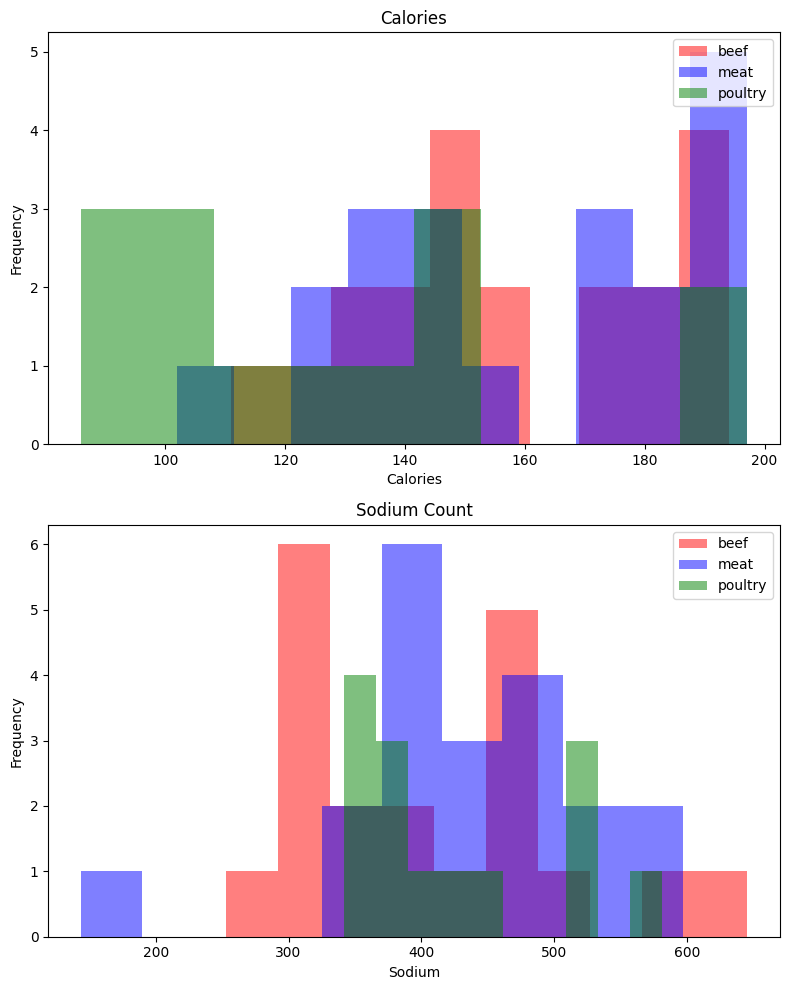

In [8]:
# QUESTION
import pandas as pd
import matplotlib.pyplot as plt


mydataset2 = {
    "Type": [
        "Beef", "Beef", "Beef", "Beef", "Beef", "Beef", "Beef", "Beef", "Beef", "Beef", "Beef", "Beef", "Beef", "Beef", "Beef", "Beef", "Beef", "Beef", "Beef", "Beef",
        "Meat", "Meat", "Meat", "Meat", "Meat", "Meat", "Meat", "Meat", "Meat", "Meat", "Meat", "Meat", "Meat", "Meat", "Meat", "Meat", "Meat", "Meat", "Meat", "Meat",
        "Poultry", "Poultry", "Poultry", "Poultry", "Poultry", "Poultry", "Poultry", "Poultry", "Poultry", "Poultry", "Poultry", "Poultry", "Poultry", "Poultry"
    ],
    "Calories": [
        186, 181, 176, 149, 194, 190, 181, 139, 175, 148, 152, 111, 141, 153, 189, 157, 131, 149, 135, 122, 173, 191, 184, 190, 172, 147, 146, 139, 175, 136,
        179, 153, 197, 195, 135, 140, 189, 122, 102, 129, 129, 132, 102, 196, 94, 102, 87, 99, 197, 113, 142, 86, 143, 144
    ],

    "Sodium": [
        495, 477, 425, 322, 482, 587, 370, 322, 479, 375, 338, 300, 395, 481, 645, 449, 317, 319, 298, 253,
        458, 596, 473, 545, 496, 360, 387, 386, 597, 393, 485, 372, 144, 511, 485, 428, 339, 375, 396, 430,
        438, 375, 396, 383, 387, 342, 359, 357, 528, 513, 426, 358, 581, 522
    ]
}


df = pd.DataFrame(mydataset2)

beef_c = df[df["Type"] == "Beef"]["Calories"]
meat_c = df[df["Type"] == "Meat"]["Calories"]
poultry_c = df[df["Type"] == "Poultry"]["Calories"]

beef_s = df[df["Type"] == "Beef"]["Sodium"]
meat_s= df[df["Type"] == "Meat"]["Sodium"]
poultry_s = df[df["Type"] == "Poultry"]["Sodium"]


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))


# DISTRIBUTION COLORS FOR BOTH CHARTS
#  RED FOR BEEF
#  BLUE FOR MEAT
#  GREEN FOR POULTRY


ax1.hist(beef_c, bins=10, alpha=0.5, label = 'beef', color='red')
ax1.hist(meat_c, bins=10, alpha=0.5, label = 'meat', color='blue')
ax1.hist(poultry_c, bins=10, alpha=0.5, label = 'poultry', color='green')
ax1.set_xlabel('Calories')
ax1.set_ylabel('Frequency')
ax1.set_title('Calories')
ax1.legend(loc='upper right')

ax2.hist(beef_s, bins=10, alpha=0.5, label= 'beef', color='red')
ax2.hist(meat_s, bins=10, alpha=0.5, label=  'meat', color='blue')
ax2.hist(poultry_s, bins=10, alpha=0.5, label= 'poultry', color='green')

ax2.set_xlabel('Sodium')
ax2.set_ylabel('Frequency')
ax2.set_title('Sodium Count')
ax2.legend(loc='upper right')


plt.tight_layout()


plt.show()

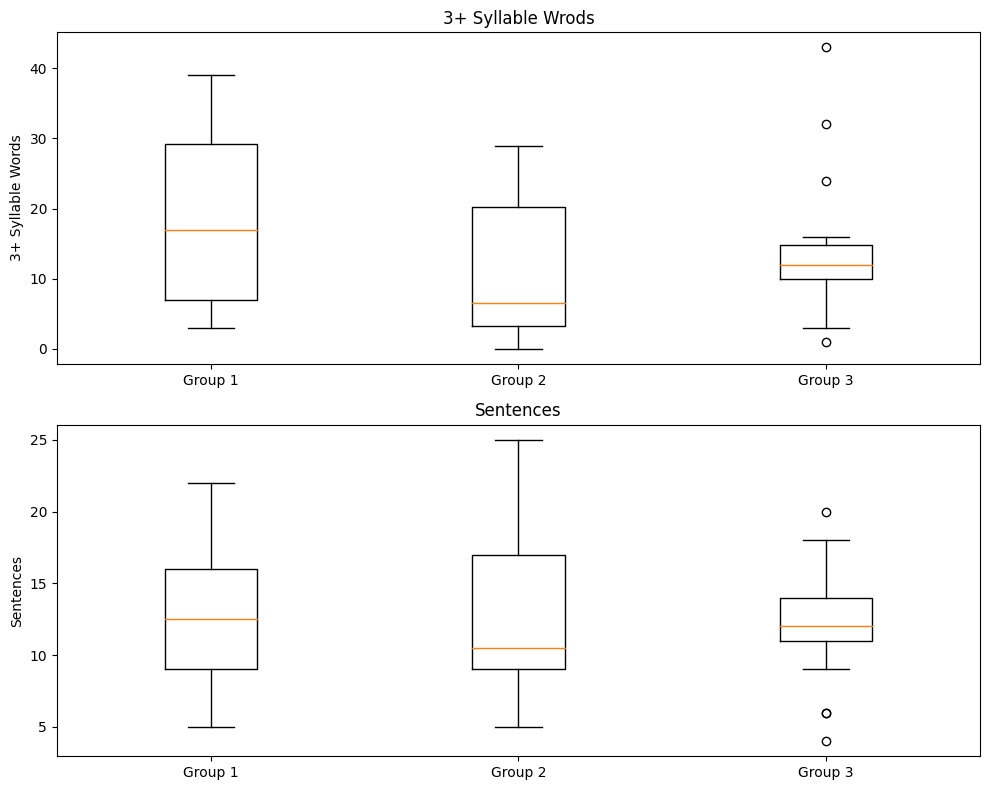

In [12]:
# Question 7

import pandas as pd
import matplotlib.pyplot as plt


data = {
    "WDS": [205, 203, 229, 208, 146, 230, 215, 153, 205, 80, 208, 89, 49, 93, 46, 34, 39, 88, 191, 219, 205, 57, 105, 109, 82, 88, 39, 94, 206, 197, 68, 44, 203, 139, 72, 67, 162, 31, 85, 111, 88, 60, 97, 169, 78, 68, 32, 50, 208, 81, 83, 195, 111, 208],
    "SEN": [9, 20, 18, 16, 9, 16, 16, 9, 11, 13, 22, 16, 5, 18, 6, 6, 5, 12, 25, 17, 23, 7, 10, 9, 10, 10, 5, 11, 18, 18, 9, 9, 17, 13, 11, 7, 14, 6, 11, 12, 11, 15, 6, 12, 14, 11, 4, 9, 18, 12, 12, 17, 11, 20],
    "3SYL": [34, 21, 37, 31, 10, 24, 39, 10, 17, 18, 32, 17, 3, 10, 6, 5, 6, 6, 13, 22, 25, 3, 5, 2, 9, 3, 0, 4, 29, 26, 5, 5, 24, 15, 3, 8, 16, 9, 10, 3, 12, 10, 10, 11, 12, 13, 1, 9, 43, 13, 14, 32, 24, 15],
   "GRP": [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
}


df = pd.DataFrame(data)

plt.figure(figsize=(10, 8))


plt.subplot(2, 1, 1)
plt.boxplot([df[df["GRP"] == i]["3SYL"] for i in range(1, 4)], labels=["Group 1", "Group 2", "Group 3"])
plt.title("3+ Syllable Wrods")
plt.ylabel("3+ Syllable Words")


plt.subplot(2, 1, 2)
plt.boxplot([df[df["GRP"] == i]["SEN"] for i in range(1, 4)], labels=["Group 1", "Group 2", "Group 3"])
plt.title("Sentences")
plt.ylabel("Sentences")


plt.tight_layout()
plt.show()
